In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/telecom_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop(columns='customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
           ..
1237.3      1
4985.9      1
4859.95     1
3735.45     1
38.45       1
Name: TotalCharges, Length: 6531, dtype: int64

In [8]:
df['TotalCharges'].replace(' ', np.nan, inplace=True)

In [9]:

df['TotalCharges'].isnull().sum()

11

In [10]:
df['TotalCharges']=df['TotalCharges'].astype('float')

In [11]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
df_cat=df.select_dtypes("object")

In [14]:

le = LabelEncoder()
for col in df_cat :
  df_cat[col] = le.fit_transform(df_cat[col])

In [15]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [16]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [17]:
df_num = df[['tenure','MonthlyCharges','TotalCharges']]
df_num

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [18]:
df_new = pd.concat([df_num,df_cat, df['SeniorCitizen']], axis=1)
df_new.head()

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
1,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0
2,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0
3,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0
4,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0


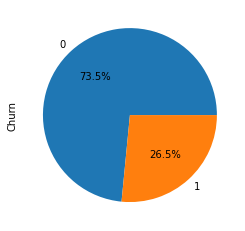

In [19]:
df_new['Churn'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [20]:
x = df_new.drop("Churn", axis=1)
y = df_new['Churn']

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [22]:
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)

In [23]:
model = Sequential()

model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [25]:
model.fit(xtrain, ytrain, epochs=300)

Epoch 1/300
177/177 [==============================] - 1s 2ms/step - loss: 0.5271
Epoch 2/300
177/177 [==============================] - 0s 2ms/step - loss: 0.4419
Epoch 3/300
177/177 [==============================] - 0s 2ms/step - loss: 0.4312
Epoch 4/300
177/177 [==============================] - 0s 2ms/step - loss: 0.4281
Epoch 5/300
177/177 [==============================] - 0s 2ms/step - loss: 0.4216
Epoch 6/300
177/177 [==============================] - 0s 2ms/step - loss: 0.4201
Epoch 7/300
177/177 [==============================] - 0s 2ms/step - loss: 0.4159
Epoch 8/300
177/177 [==============================] - 0s 2ms/step - loss: 0.4152
Epoch 9/300
177/177 [==============================] - 0s 1ms/step - loss: 0.4116
Epoch 10/300
177/177 [==============================] - 0s 2ms/step - loss: 0.4097
Epoch 11/300
177/177 [==============================] - 0s 2ms/step - loss: 0.4079
Epoch 12/300
177/177 [==============================] - 0s 2ms/step - loss: 0.4073
Epoch 13/300


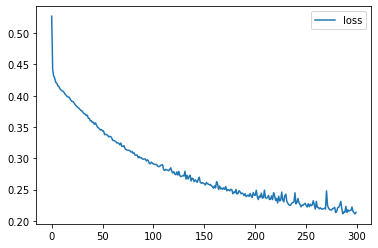

In [26]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [27]:
from tensorflow.keras.callbacks  import EarlyStopping

model = Sequential()

model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [28]:
earlystop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [29]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/600
177/177 [==============================] - 1s 3ms/step - loss: 0.5218 - val_loss: 0.4944
Epoch 2/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4683 - val_loss: 0.4442
Epoch 3/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4592 - val_loss: 0.4656
Epoch 4/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4432 - val_loss: 0.4414
Epoch 5/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4344 - val_loss: 0.4385
Epoch 6/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4246 - val_loss: 0.4415
Epoch 7/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4208 - val_loss: 0.4431
Epoch 8/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4196 - val_loss: 0.4650
Epoch 9/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4163 - val_loss: 0.4683
Epoch 10/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4124 - val_lo

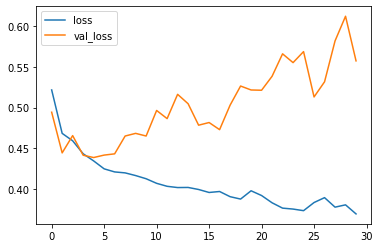

In [30]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [31]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [32]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/600
177/177 [==============================] - 1s 3ms/step - loss: 0.5423 - val_loss: 0.4633
Epoch 2/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4906 - val_loss: 0.4407
Epoch 3/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4653 - val_loss: 0.4561
Epoch 4/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4554 - val_loss: 0.4559
Epoch 5/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4418 - val_loss: 0.4576
Epoch 6/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4394 - val_loss: 0.4566
Epoch 7/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4333 - val_loss: 0.4410
Epoch 8/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4341 - val_loss: 0.4639
Epoch 9/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4336 - val_loss: 0.4456
Epoch 10/600
177/177 [==============================] - 0s 2ms/step - loss: 0.4245 - val_lo

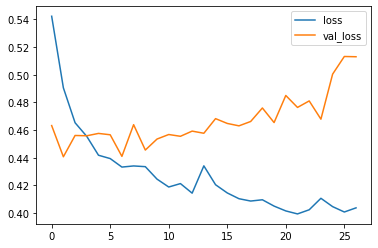

In [33]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [34]:
ypred=model.predict(xtest)

In [35]:
ypred=ypred>0.5

In [36]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1061
           1       0.59      0.59      0.59       348

    accuracy                           0.80      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [37]:
from tensorflow.keras.models import load_model
model.save("telecom_churn.")

INFO:tensorflow:Assets written to: telecom_churn./assets
